In [ ]:
!pip install scipy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats
import warnings
warnings.filterwarnings("ignore")


### Housing Data -

In [2]:
review = pd.read_csv("Housing.csv")
review


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [16]:
review.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [15]:
review.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [17]:
review.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [25]:
review["price"].unique()

array([13300000, 12250000, 12215000, 11410000, 10850000, 10150000,
        9870000,  9800000,  9681000,  9310000,  9240000,  9100000,
        8960000,  8890000,  8855000,  8750000,  8680000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8295000,  8190000,
        8120000,  8080940,  8043000,  7980000,  7962500,  7910000,
        7875000,  7840000,  7700000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7350000,  7343000,  7245000,  7210000,
        7140000,  7070000,  7035000,  7000000,  6930000,  6895000,
        6860000,  6790000,  6755000,  6720000,  6685000,  6650000,
        6629000,  6615000,  6580000,  6510000,  6475000,  6440000,
        6419000,  6405000,  6300000,  6293000,  6265000,  6230000,
        6195000,  6160000,  6125000,  6107500,  6090000,  6083000,
        6020000,  5950000,  5943000,  5880000,  5873000,  5866000,
        5810000,  5803000,  5775000,  5740000,  5652500,  5600000,
        5565000,  5530000,  5523000,  5495000,  5460000,  5425

In [26]:
review.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [27]:
review["parking"].unique()

array([2, 3, 0, 1])

In [29]:
review["price"].value_counts()

price
4200000    17
3500000    17
4900000    12
5250000     9
5600000     9
           ..
2135000     1
1960000     1
1855000     1
1820000     1
1767150     1
Name: count, Length: 219, dtype: int64

In [31]:
review["bedrooms"].value_counts()

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

In [33]:
review.iloc[0:11,0:]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


#### prefarea with price and areasize -

In [35]:
review.loc[0:10,["price","area","prefarea"]]

,price,area,prefarea
0,13300000,7420,yes
1,12250000,8960,no
2,12250000,9960,yes
3,12215000,7500,yes
4,11410000,7420,no
5,10850000,7500,yes
6,10150000,8580,yes
7,10150000,16200,no
8,9870000,8100,yes
9,9800000,5750,yes


In [42]:
grp_data = review.groupby('mainroad')
grp_data

#### Prices (min to max) -

In [45]:
grp_data1 = review.groupby("price")
grp_data

In [49]:
grp_data1.max()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,,,,,,,,,,,,
1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished
1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
1890000,3649,3,1,2,yes,no,no,no,no,0,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...
10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished


In [12]:
print("Highest price of house is : ",max(review.price))

Highest price of house is :  13300000


In [13]:
print("Lowest price of House is : ",min(review.price))

Lowest price of House is :  1750000


#### Area  (min to max) -

In [56]:
review.groupby("area").max()

,price,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
area,,,,,,,,,,,,
1650,3150000,3,1,2,no,no,yes,no,no,0,no,unfurnished
1700,1890000,3,1,2,yes,no,no,no,no,0,no,unfurnished
1836,2275000,2,1,1,no,no,yes,no,no,0,no,semi-furnished
1905,4340000,5,1,2,no,no,yes,no,no,0,no,semi-furnished
1950,3430000,3,2,2,yes,no,yes,yes,no,0,yes,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...
12900,4900000,3,1,1,yes,no,no,no,no,2,no,furnished
12944,3500000,3,1,1,yes,no,no,no,no,0,no,unfurnished
13200,9800000,3,1,2,yes,no,yes,yes,yes,2,yes,furnished


In [76]:
print("largest area is : ",max(review.area))

largest area is :  16200


In [72]:
print("Minimum area is : ",min(review.area))

Minimum area is :  1650


In [73]:
print("MInimum price of housing area is : ",min(review.price))

MInimum price of housing area is :  1750000


In [78]:
print("Maximum price of housing area is : ",max(review.price))

Maximum price of housing area is :  13300000


In [79]:
review.isnull().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool

In [80]:
review.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [87]:
(review.price).mean()

np.float64(4766729.247706422)

In [88]:
(review.price).mean()*100

np.float64(476672924.77064216)

In [89]:
print("The mean value of prices is :",(review.price).mean())

The mean value of prices is : 4766729.247706422


In [90]:
print("The mean value of area is :",(review.area).mean())

The mean value of area is : 5150.54128440367


In [91]:
print("The median value of prices is :",(review.price).median())

The median value of prices is : 4340000.0


In [100]:
print("The median value of area is :",(review.area).median())

The median value of area is : 4600.0


In [101]:
review.iloc[272:273,0:2]

,price,area
272,4340000,4075


In [110]:
review.loc[0:272,["area"]]

,area
0,7420
1,8960
2,9960
3,7500
4,7420
...,...
268,4950
269,3900
270,4500
271,1905


In [111]:
print("The median value of area is :",(review.area).median())

The median value of area is : 4600.0


In [112]:
review

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [113]:
review.drop(index = [2,4,6,8,10],axis = 1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [127]:
review

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,no,no,no,no,no,0,no,furnished


In [128]:
review

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,no,no,no,no,no,0,no,furnished


In [129]:
review.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 545, dtype: bool

In [130]:
review.duplicated().sum()

np.int64(0)

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### Simple random sampling -

In [5]:
review

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [14]:
review = pd.read_csv("Housing.csv")
review

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [18]:
data = review.area
data

0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 545, dtype: int64

In [21]:
n = int(input("Enter any sample number : "))
print()

sample_review = review.sample(n)
print("Simple random sampling : ")
sample_data

Enter any sample number :  10



Simple random sampling : 


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
252,4515000,9860,3,1,1,yes,no,no,no,no,0,no,semi-furnished
249,4543000,4990,4,2,2,yes,yes,yes,no,no,0,yes,furnished
57,7245000,9000,4,2,4,yes,yes,no,no,yes,1,yes,furnished
506,2604000,2910,2,1,1,no,no,no,no,no,0,no,unfurnished
473,3003000,8050,2,1,1,yes,no,no,no,no,0,no,unfurnished
422,3360000,3720,2,1,1,no,no,no,no,yes,0,no,unfurnished
376,3640000,4130,3,2,2,yes,no,no,no,no,2,no,semi-furnished
162,5460000,6600,4,2,2,yes,yes,yes,no,no,0,yes,semi-furnished
63,7035000,6360,4,2,3,yes,no,no,no,yes,2,yes,furnished
227,4690000,6000,2,1,1,yes,no,yes,no,yes,1,no,furnished


In [22]:
n = int(input("Enter any sample number : "))
print()

sample_data = data.sample(n,random_state = 42)
print("Simple random sampling : ")
sample_data

Enter any sample number :  10



Simple random sampling : 


316    5900
77     6500
360    4040
90     5000
493    3960
209    6720
176    8520
249    4990
516    3240
426    2700
Name: area, dtype: int64

### Systematic sampling -

In [23]:
n = int(input("Enter any sample number : "))
print()

sample_df = review.iloc[::n]
sample_df

Enter any sample number :  10


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
20,8750000,4320,3,1,2,yes,no,yes,yes,no,2,no,semi-furnished
30,8400000,7475,3,2,4,yes,no,no,no,yes,2,no,unfurnished
40,7875000,6550,3,1,2,yes,no,yes,no,yes,0,yes,furnished
50,7420000,7440,3,2,4,yes,no,no,no,no,1,yes,unfurnished
60,7140000,6000,3,2,2,yes,yes,no,no,no,1,no,semi-furnished
70,6790000,4000,3,2,2,yes,no,yes,no,yes,0,yes,semi-furnished
80,6629000,6000,3,1,2,yes,no,no,yes,no,1,yes,semi-furnished
90,6440000,5000,3,1,2,yes,no,no,no,yes,0,no,semi-furnished


In [24]:
n = int(input("Enter any sample number : "))
print()

sample_df = review.iloc[::n]
sample_df

Enter any sample number :  100


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
100,6230000,6600,3,2,1,yes,no,yes,no,yes,0,yes,unfurnished
200,4900000,4520,3,1,2,yes,no,yes,no,yes,0,no,semi-furnished
300,4200000,4079,3,1,3,yes,no,no,no,no,0,no,semi-furnished
400,3500000,3512,2,1,1,yes,no,no,no,no,1,yes,unfurnished
500,2660000,2800,3,1,1,yes,no,no,no,no,0,no,unfurnished


In [25]:
n = int(input("Enter any sample number : "))
print()

sample_df = data.iloc[::n]
sample_df

Enter any sample number :  10


0       7420
10     13200
20      4320
30      7475
40      6550
50      7440
60      6000
70      4000
80      6000
90      5000
100     6600
110     6600
120     6540
130     4800
140     5800
150     5136
160     6210
170     5500
180     4500
190     7600
200     4520
210     4646
220     8100
230     5400
240     3840
250     3510
260     3162
270     4500
280     6360
290     2610
300     4079
310     5985
320     4320
330     4050
340     5300
350     3420
360     4040
370     4280
380     4500
390     2135
400     3512
410     3850
420     4120
430     2500
440     3640
450     3450
460     8100
470     5076
480     3480
490     4350
500     2800
510     2880
520     7700
530     1950
540     3000
Name: area, dtype: int64

In [26]:
n = int(input("Enter any sample number : "))
print()

sample_df = data.iloc[::n]
sample_df

Enter any sample number :  100


0      7420
100    6600
200    4520
300    4079
400    3512
500    2800
Name: area, dtype: int64

In [27]:
review.price.unique()

array([13300000, 12250000, 12215000, 11410000, 10850000, 10150000,
        9870000,  9800000,  9681000,  9310000,  9240000,  9100000,
        8960000,  8890000,  8855000,  8750000,  8680000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8295000,  8190000,
        8120000,  8080940,  8043000,  7980000,  7962500,  7910000,
        7875000,  7840000,  7700000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7350000,  7343000,  7245000,  7210000,
        7140000,  7070000,  7035000,  7000000,  6930000,  6895000,
        6860000,  6790000,  6755000,  6720000,  6685000,  6650000,
        6629000,  6615000,  6580000,  6510000,  6475000,  6440000,
        6419000,  6405000,  6300000,  6293000,  6265000,  6230000,
        6195000,  6160000,  6125000,  6107500,  6090000,  6083000,
        6020000,  5950000,  5943000,  5880000,  5873000,  5866000,
        5810000,  5803000,  5775000,  5740000,  5652500,  5600000,
        5565000,  5530000,  5523000,  5495000,  5460000,  5425

In [28]:
review.area.unique()

array([ 7420,  8960,  9960,  7500,  8580, 16200,  8100,  5750, 13200,
        6000,  6550,  3500,  7800,  6600,  8500,  4600,  6420,  4320,
        7155,  8050,  4560,  8800,  6540,  8875,  7950,  5500,  7475,
        7000,  4880,  5960,  6840,  7482,  9000,  6360,  6480,  4300,
        7440,  6325,  5150, 11440,  7680,  8880,  6240, 11175,  7700,
       12090,  4000,  5020,  4040,  4260,  6500,  5700, 10500,  3760,
        8250,  6670,  3960,  7410,  5000,  6750,  4800,  7200,  4100,
        6400,  6350,  4500,  5450,  3240,  6615,  8372,  9620,  6800,
        8000,  6900,  3700,  7020,  7231,  6254,  7320,  6525, 15600,
        7160, 11460,  5828,  5200,  5400,  4640,  5800,  6660,  4700,
        5136,  4400,  3300,  3650,  6100,  2817,  7980,  3150,  6210,
        6825,  6710,  6450, 10269,  8400,  5300,  3800,  9800,  8520,
        6050,  7085,  3180,  3410,  3000, 11410,  5720,  3540,  7600,
       10700,  8150,  4410,  7686,  2800,  5948,  4200,  4520,  4095,
        4120,  4770,

In [29]:
startified_df = review.groupby("price")
startified_df

In [8]:
startified_data = review.groupby("furnishingstatus").apply(lambda x:x.sample(min(len(x),5)))
startified_data

price   area  bedrooms  bathrooms  stories mainroad  \
furnishingstatus                                                              
furnished        82   6615000  10500         3          2        1      yes   
                 259  4473000   6360         2          1        1      yes   
                 407  3465000   2145         3          1        3      yes   
                 411  3430000   2145         3          1        3      yes   
                 232  4655000   3745         3          1        2      yes   
semi-furnished   527  2275000   1836         2          1        1       no   
                 175  5250000   9800         4          2        2      yes   
                 378  3640000   2275         3          1        3      yes   
                 167  5285000   4600         2          2        1      yes   
                 87   6475000   3960         3          1        1      yes   
unfurnished      521  2408000   3635         2          1        1       no   
                 538  1890000   3649         2          1        1      yes   
                 401  3500000   9500         3          1        2      yes   
                 518  2450000   3500         2          1        1      yes   
                 390  3500000   2135         3          2        2       no   

                     guestroom basement hotwaterheating airconditioning  \
furnishingstatus                                                          
furnished        82         no      yes              no             yes   
                 259        no      yes              no             yes   
                 407        no       no              no              no   
                 411        no       no              no              no   
                 232        no      yes              no              no   
semi-furnished   527        no      yes              no              no   
                 175       yes       no              no              no   
                 378        no       no             yes             yes   
                 167        no       no              no             yes   
                 87         no      yes              no              no   
unfurnished      521        no       no              no              no   
                 538        no       no              no              no   
                 401        no       no              no              no   
                 518       yes       no              no              no   
                 390        no       no              no              no   

                      parking prefarea furnishingstatus  
furnishingstatus                                         
furnished        82         1      yes        furnished  
                 259        1       no        furnished  
                 407        0      yes        furnished  
                 411        0      yes        furnished  
                 232        0       no        furnished  
semi-furnished   527        0       no   semi-furnished  
                 175        2       no   semi-furnished  
                 378        0      yes   semi-furnished  
                 167        2       no   semi-furnished  
                 87         2       no   semi-furnished  
unfurnished      521        0       no      unfurnished  
                 538        0       no      unfurnished  
                 401        3      yes      unfurnished  
                 518        0       no      unfurnished  
                 390        0       no      unfurnished

In [9]:
startified_data = review.groupby("furnishingstatus",group_keys = False).apply(lambda x:x.sample(min(len(x),5)))
startified_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
339,3885000,3180,4,2,2,yes,no,no,no,no,0,no,furnished
155,5530000,6100,3,2,1,yes,no,yes,no,no,2,yes,furnished
331,3920000,7260,3,2,1,yes,yes,yes,no,no,3,no,furnished
509,2590000,3600,2,2,2,yes,no,yes,no,no,1,no,furnished
145,5600000,5000,3,1,4,yes,no,no,no,no,0,no,furnished
419,3360000,4960,4,1,3,no,no,no,no,no,0,no,semi-furnished
527,2275000,1836,2,1,1,no,no,yes,no,no,0,no,semi-furnished
132,5810000,5200,3,1,3,yes,no,no,no,yes,0,no,semi-furnished
228,4690000,3630,3,1,2,yes,no,no,no,no,2,no,semi-furnished
289,4200000,5850,2,1,1,yes,yes,yes,no,no,2,no,semi-furnished


### Cluster Sampling - 

In [7]:
clusters = review.stories.unique()
clusters

array([3, 4, 2, 1])

In [41]:
review.stories.unique()

df = pd.concat(review[review["stories"]==i].sample(5) for i in np.random.choice(clusters,size = 2 ,replace = False))
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
26,8463000,6000,3,2,4,yes,yes,yes,no,yes,0,yes,semi-furnished
105,6160000,4500,3,1,4,yes,no,no,no,yes,0,no,unfurnished
57,7245000,9000,4,2,4,yes,yes,no,no,yes,1,yes,furnished
226,4690000,5170,3,1,4,yes,no,no,no,yes,0,no,semi-furnished
38,7962500,6000,3,1,4,yes,yes,no,no,yes,2,no,unfurnished
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
208,4900000,2970,3,1,3,yes,no,no,no,no,0,no,semi-furnished
215,4830000,4160,3,1,3,yes,no,no,no,no,0,no,unfurnished
103,6195000,6350,3,2,3,yes,yes,no,no,yes,0,no,furnished
488,2852500,5200,4,1,3,yes,no,no,no,no,0,no,unfurnished


In [8]:
review.stories.unique()

df = pd.concat(review[review["stories"]==i].sample(3) for i in np.random.choice(clusters,size = 2 ,replace = False))
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
161,5460000,6100,3,1,3,yes,yes,no,no,yes,0,yes,semi-furnished
76,6650000,6420,3,2,3,yes,no,no,no,yes,0,yes,furnished
108,6107500,3240,4,1,3,yes,no,no,no,no,1,no,semi-furnished
191,5040000,10700,3,1,2,yes,yes,yes,no,no,0,no,semi-furnished
34,8120000,6840,5,1,2,yes,yes,yes,no,yes,1,no,furnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished


In [42]:
review.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [43]:
review["area"]

0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 545, dtype: int64

### 5 number summary - (Quartiles)

In [45]:
print(f" Minimum - {review.price.min()}")
print(f" Q1 - {review.price.quantile(0.25)}")
print(f" Q2 - {review.price.quantile(0.5)}")
print(f" Q3 - {review.price.quantile(0.75)}")
print(f" Maximum - {review.price.max()}")

 Minimum - 1750000
 Q1 - 3430000.0
 Q2 - 4340000.0
 Q3 - 5740000.0
 Maximum - 13300000


In [9]:
print(f" Minimum - {review.area.min()} m.sq")
print(f" Q1 - {review.area.quantile(0.25)} m.sq")
print(f" Q2 - {review.area.quantile(0.5)} m.sq")
print(f" Q3 - {review.area.quantile(0.75)} m.sq")
print(f" Maximum - {review.area.max()}m.sq")

 Minimum - 1650 m.sq
 Q1 - 3600.0 m.sq
 Q2 - 4600.0 m.sq
 Q3 - 6360.0 m.sq
 Maximum - 16200m.sq


In [11]:
review[review["area"] >= 15000]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished


In [15]:
review[review["area"] <=2000]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
271,4340000,1905,5,1,2,no,no,yes,no,no,0,no,semi-furnished
413,3430000,1950,3,2,2,yes,no,yes,no,no,0,yes,unfurnished
449,3150000,1650,3,1,2,no,no,yes,no,no,0,no,unfurnished
498,2660000,2000,2,1,2,yes,no,no,no,no,0,no,semi-furnished
527,2275000,1836,2,1,1,no,no,yes,no,no,0,no,semi-furnished
530,2240000,1950,3,1,1,no,no,no,yes,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [17]:
len(review[review["area"]<=2000])

7

In [19]:
### pentiles -
review.describe(percentiles = [0.2,0.4,0.6,0.8,1.0])

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
20%,3.290000e+06,3450.000000,2.000000,1.000000,1.000000,0.000000
40%,3.990000e+06,4065.000000,3.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
60%,4.830000e+06,5400.000000,3.000000,1.000000,2.000000,1.000000
80%,6.093500e+06,6600.000000,3.000000,2.000000,2.000000,2.000000
100%,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [20]:
review.describe(percentiles = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
10%,2.835000e+06,3000.000000,2.000000,1.000000,1.000000,0.000000
20%,3.290000e+06,3450.000000,2.000000,1.000000,1.000000,0.000000
30%,3.605000e+06,3664.000000,3.000000,1.000000,1.000000,0.000000
40%,3.990000e+06,4065.000000,3.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
60%,4.830000e+06,5400.000000,3.000000,1.000000,2.000000,1.000000


### Outlier detection -

#### Using IQR (Inter - Quartile Range) :

In [22]:
review["area"]

0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 545, dtype: int64

In [26]:
Q1 = review.area.quantile(0.25)
Q2 = review.area.quantile(0.5)
Q3 = review.area.quantile(0.75)
print("The first quantile of area is : ",Q1)
print("The second quantile of area is : ",Q2)
print("The third quantile of area is : ",Q3)


The first quantile of area is :  3600.0
The second quantile of area is :  4600.0
The third quantile of area is :  6360.0


In [28]:
# For area 
Q1 = review.area.quantile(0.25)
Q3 = review.area.quantile(0.75)

IQR = Q3 - Q1
print(f"IQR : {IQR}")

#Define upper and lower bound for outliers

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = [x for x in review["area"] if x < lower_bound or x > upper_bound]

print(f"Lower bound for outliers : {lower_bound}")
print(f"Upper bound for outliers : {upper_bound}")
print(f"Identified Outliers : {outliers}")

IQR : 2760.0
Lower bound for outliers : -540.0
Upper bound for outliers : 10500.0
Identified Outliers : [16200, 13200, 11440, 11175, 13200, 12090, 15600, 11460, 11410, 10700, 12900, 12944]


In [29]:
# For price -
Q1 = review.price.quantile(0.25)
Q3 = review.price.quantile(0.75)

IQR = Q3 - Q1
print(f"IQR : {IQR}")

#Define upper and lower bound for outliers

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = [x for x in review["price"] if x < lower_bound or x > upper_bound]

print(f"Lower bound for outliers : {lower_bound}")
print(f"Upper bound for outliers : {upper_bound}")
print(f"Identified Outliers : {outliers}")

IQR : 2310000.0
Lower bound for outliers : -35000.0
Upper bound for outliers : 9205000.0
Identified Outliers : [13300000, 12250000, 12250000, 12215000, 11410000, 10850000, 10150000, 10150000, 9870000, 9800000, 9800000, 9681000, 9310000, 9240000, 9240000]


### Using Box Plot -

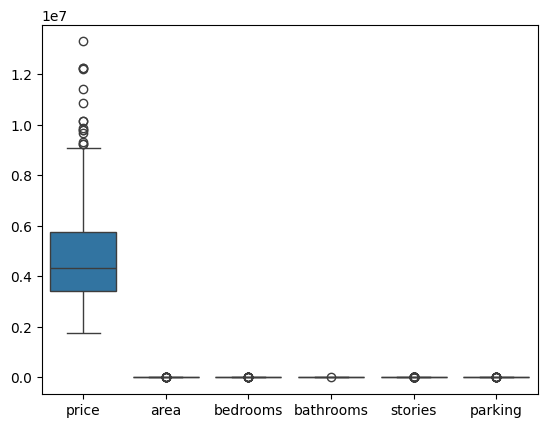

In [32]:
sns.boxplot(review)
plt.show()

In [55]:
review[(review["area"] <= -540.0) | (review["area"] >= 10500.0)]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
82,6615000,10500,3,2,1,yes,no,yes,no,yes,1,yes,furnished
142,5600000,10500,4,2,2,yes,no,no,no,no,1,no,semi-furnished
146,5600000,10500,2,1,1,yes,no,no,no,no,1,no,semi-furnished


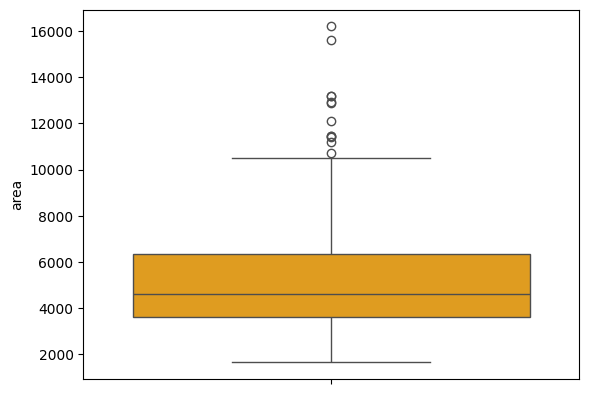

In [42]:
sns.boxplot(review["area"],color = "orange")
plt.show()

In [75]:
review[(review["area"] < 2000) | (review["area"] > 10500.0)].index

Index([271, 413, 449, 527, 530, 537], dtype='int64')

In [52]:
review.drop(index = [66,69,125,129,186,191,211,403],axis = 0,inplace = True)

In [64]:
review[(review["area"] < -540.0) | (review["area"] > 10500.0)].index

Index([], dtype='int64')

In [58]:
review.drop(index = [82,142,146],axis = 0,inplace = True)

In [53]:
review

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [67]:
# For area -
Q1 = review.area.quantile(0.25)
Q3 = review.area.quantile(0.75)

IQR = Q3 - Q1
print(f"IQR : {IQR}")

#Define upper and lower bound for outliers

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = [x for x in review["area"] if x < lower_bound or x > upper_bound]

print(f"Lower bound for outliers : {lower_bound}")
print(f"Upper bound for outliers : {upper_bound}")
print(f"Identified Outliers : {outliers}")

IQR : 2707.5
Lower bound for outliers : -536.25
Upper bound for outliers : 10293.75
Identified Outliers : [10360]


In [68]:
# For price -
Q1 = review.price.quantile(0.25)
Q3 = review.price.quantile(0.75)

IQR = Q3 - Q1
print(f"IQR : {IQR}")

#Define upper and lower bound for outliers

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = [x for x in review["price"] if x < lower_bound or x > upper_bound]

print(f"Lower bound for outliers : {lower_bound}")
print(f"Upper bound for outliers : {upper_bound}")
print(f"Identified Outliers : {outliers}")

IQR : 2209375.0
Lower bound for outliers : 115937.5
Upper bound for outliers : 8953437.5
Identified Outliers : [13300000, 12250000, 12250000, 12215000, 11410000, 10850000, 10150000, 9870000, 9800000, 9681000, 9310000, 9240000, 9240000, 9100000, 9100000, 8960000]


In [69]:
review[(review["price"] < 115937.5) | (review["price"] > 8953437.5)].index

Index([0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17], dtype='int64')

In [70]:
review.drop(index = [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17],axis = 0,inplace = True)

In [71]:
review

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
20,8750000,4320,3,1,2,yes,no,yes,yes,no,2,no,semi-furnished
21,8680000,7155,3,2,1,yes,yes,yes,no,yes,2,no,unfurnished
22,8645000,8050,3,1,1,yes,yes,yes,no,yes,1,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [72]:
# For price -
Q1 = review.price.quantile(0.25)
Q3 = review.price.quantile(0.75)

IQR = Q3 - Q1
print(f"IQR : {IQR}")

#Define upper and lower bound for outliers

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = [x for x in review["price"] if x < lower_bound or x > upper_bound]

print(f"Lower bound for outliers : {lower_bound}")
print(f"Upper bound for outliers : {upper_bound}")
print(f"Identified Outliers : {outliers}")

IQR : 2133250.0
Lower bound for outliers : 195125.0
Upper bound for outliers : 8728125.0
Identified Outliers : [8890000, 8855000, 8750000]


In [74]:
print(review[(review["price"] <= 115937.5) | (review["price"] >= 8953437.5)].index)

Index([], dtype='int64')


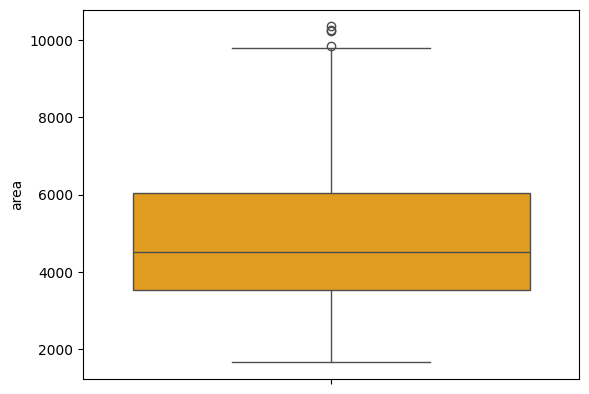

In [76]:
sns.boxplot(review["area"],color = "orange")
plt.show()

In [78]:
review[(review["area"] < 1000) | (review["area"] > 9500)]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
113,6083000,9620,3,1,1,yes,no,yes,no,no,2,yes,furnished
171,5250000,10269,3,1,1,yes,no,no,no,no,1,yes,semi-furnished
175,5250000,9800,4,2,2,yes,yes,no,no,no,2,no,semi-furnished
224,4760000,10240,2,1,1,yes,no,no,no,yes,2,yes,unfurnished
229,4690000,9667,4,2,2,yes,yes,yes,no,no,1,no,semi-furnished
252,4515000,9860,3,1,1,yes,no,no,no,no,0,no,semi-furnished
277,4305000,10360,2,1,1,yes,no,no,no,no,1,yes,semi-furnished


In [79]:
review[(review["area"] < 1000) | (review["area"] > 9500)].index

Index([113, 171, 175, 224, 229, 252, 277], dtype='int64')

In [80]:
review.drop(index = [113, 171, 175, 224, 229, 252, 277],axis = 0,inplace = True)

In [82]:
# Identifying Outliers for area after removing outliers index -
Q1 = review.area.quantile(0.25)
Q3 = review.area.quantile(0.75)

IQR = Q3 - Q1
print(f"IQR : {IQR}")

#Define upper and lower bound for outliers

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = [x for x in review["area"] if x < lower_bound or x > upper_bound]

print(f"Lower bound for outliers : {lower_bound}")
print(f"Upper bound for outliers : {upper_bound}")
print(f"Identified Outliers : {outliers}")

IQR : 2484.0
Lower bound for outliers : -210.0
Upper bound for outliers : 9726.0
Identified Outliers : []


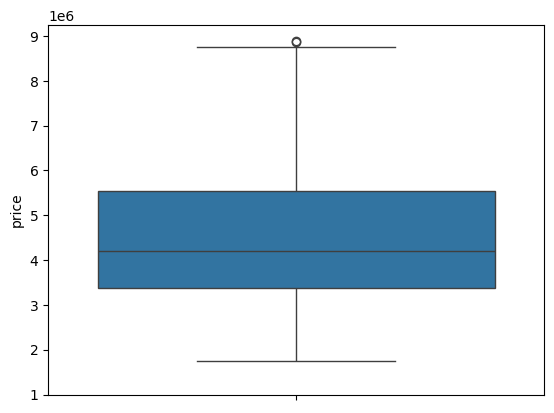

In [96]:
sns.boxplot(review["price"])
plt.yticks(np.arange(1000000,10000000,step = 1000000))
plt.show()

In [101]:
review[(review["price"] < 1500000) | (review["price"] > 8500000)]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
20,8750000,4320,3,1,2,yes,no,yes,yes,no,2,no,semi-furnished
21,8680000,7155,3,2,1,yes,yes,yes,no,yes,2,no,unfurnished
22,8645000,8050,3,1,1,yes,yes,yes,no,yes,1,no,furnished
23,8645000,4560,3,2,2,yes,yes,yes,no,yes,1,no,furnished
24,8575000,8800,3,2,2,yes,no,no,no,yes,2,no,furnished
25,8540000,6540,4,2,2,yes,yes,yes,no,yes,2,yes,furnished


In [102]:
review[(review["price"] < 1500000) | (review["price"] > 8500000)].index

Index([18, 19, 20, 21, 22, 23, 24, 25], dtype='int64')

In [103]:
review.drop(index = [18, 19, 20, 21, 22, 23, 24, 25],axis = 0,inplace = True)

In [104]:
# Identifying Outliers for price after removing outliers index -
Q1 = review.price.quantile(0.25)
Q3 = review.price.quantile(0.75)

IQR = Q3 - Q1
print(f"IQR : {IQR}")

#Define upper and lower bound for outliers

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = [x for x in review["price"] if x < lower_bound or x > upper_bound]

print(f"Lower bound for outliers : {lower_bound}")
print(f"Upper bound for outliers : {upper_bound}")
print(f"Identified Outliers : {outliers}")

IQR : 2100000.0
Lower bound for outliers : 210000.0
Upper bound for outliers : 8610000.0
Identified Outliers : []


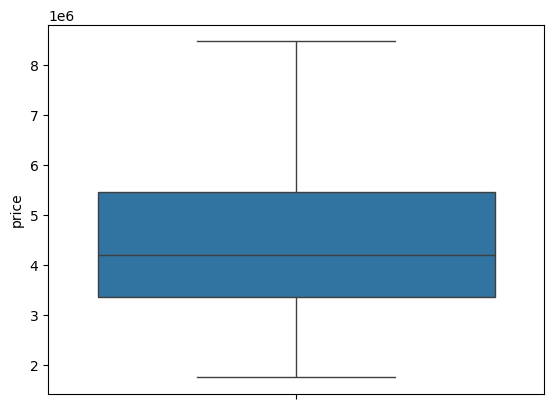

In [106]:
sns.boxplot(review["price"])
plt.show()

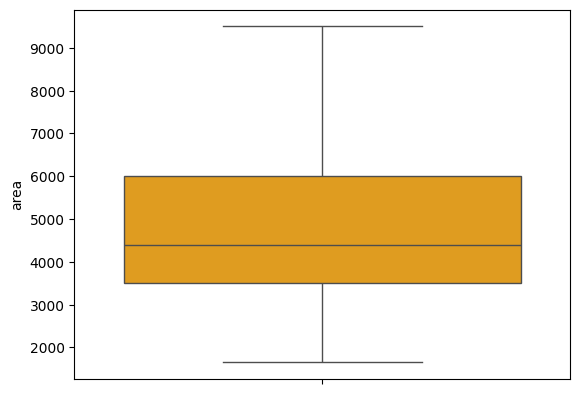

In [107]:
sns.boxplot(review["area"],color = "orange")
plt.show()

### Missing Data -

In [108]:
review.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [109]:
import warnings
warnings.filterwarnings("ignore")

In [111]:
review["area"].skew()

np.float64(0.5426164690385322)

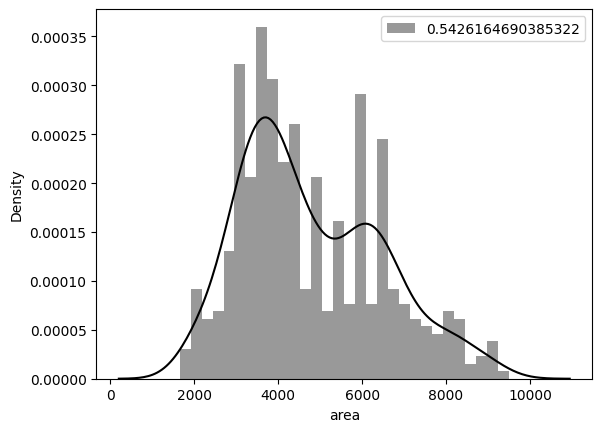

In [112]:
# Distribution Plot - 
sns.distplot(review["area"],bins = 30,color = "black" , label = review["area"].skew())
plt.legend()
plt.show()

In [114]:
print(review["area"].mean())

4783.216432865732


In [115]:
print(review["area"].median())

4400.0


In [116]:
print(review["area"].mode())

0    6000
Name: area, dtype: int64


In [117]:
### Fill missing value data - 
review["area"].fillna(review["area"].mean(),inplace = True)

In [118]:
review.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### Duplicated Data -

In [120]:
print(review.duplicated().sum())

0


In [121]:
review[review.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [123]:
review.shape

(499, 13)

In [126]:
review.drop_duplicates(keep = "first" , inplace = True)
review

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
26,8463000,6000,3,2,4,yes,yes,yes,no,yes,0,yes,semi-furnished
27,8400000,8875,3,1,1,yes,no,no,no,no,1,no,semi-furnished
28,8400000,7950,5,2,2,yes,no,yes,yes,no,2,no,unfurnished
29,8400000,5500,4,2,2,yes,no,yes,no,yes,1,yes,semi-furnished
30,8400000,7475,3,2,4,yes,no,no,no,yes,2,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [54]:
review[review.duplicated()]


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [42]:
min(review.area)

1650

### Analysing Housing data with using matplotlib and seaborn -

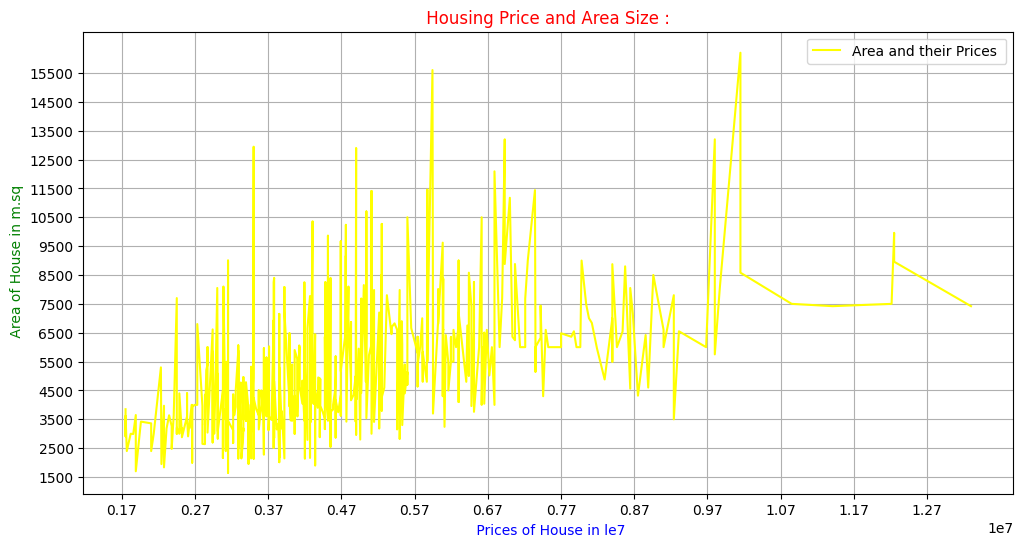

In [85]:
x = review.price
y = review.area

plt.figure(figsize = (12,6))

plt.title(" Housing Price and Area Size : ",color = "red")

plt.xlabel(" Prices of House in le7",color = "blue")
plt.ylabel(" Area of House in m.sq",color = "green")

plt.xticks(np.arange(1700000,13300001,step = 1000000))
plt.yticks(np.arange(1500,16201,step = 1000))
plt.plot(x,y,label = "Area and their Prices ",color = "yellow")
plt.grid()
plt.legend()
plt.show()

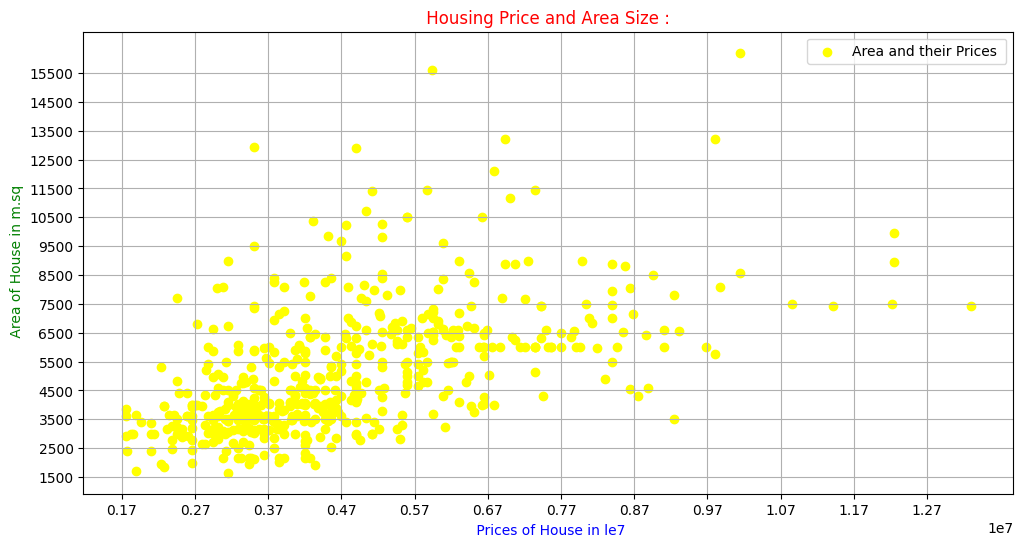

In [107]:
x = review.price
y = review.area

plt.figure(figsize = (12,6))

plt.title(" Housing Price and Area Size : ",color = "red")

plt.xlabel(" Prices of House in le7",color = "blue")
plt.ylabel(" Area of House in m.sq",color = "green")

plt.xticks(np.arange(1700000,13300001,step = 1000000))
plt.yticks(np.arange(1500,16201,step = 1000))

plt.scatter(x,y,label = "Area and their Prices ",color = "yellow")

plt.grid()
plt.legend()
plt.show()

### Anaylisng Data of Housing using Piechart -

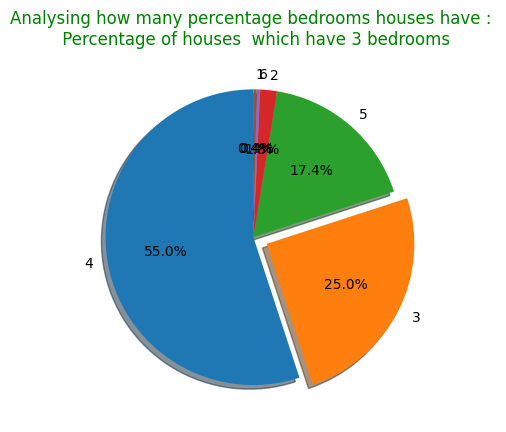

In [139]:
labels = review.bedrooms.unique()

plt.title("Analysing how many percentage bedrooms houses have : \n Percentage of houses  which have 3 bedrooms",color = "green")


plt.pie(review.bedrooms.value_counts(),labels = labels,startangle = 90,autopct="%1.1f%%",shadow = True,explode = [0,0.1,0,0,0,0])


plt.show()

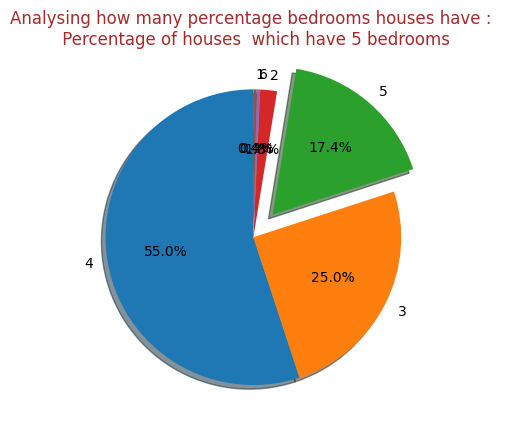

In [144]:
labels = review.bedrooms.unique()

plt.title("Analysing how many percentage bedrooms houses have : \n Percentage of houses  which have 5 bedrooms",color = "brown")


plt.pie(review.bedrooms.value_counts(),labels = labels,startangle = 90,autopct="%1.1f%%",shadow = True,explode = [0,0,0.2,0,0,0])


plt.show()

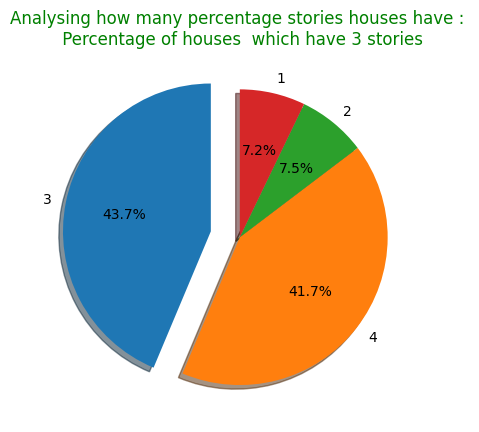

In [150]:
labels = review.stories.unique()

plt.title("Analysing how many percentage stories houses have : \n Percentage of houses  which have 3 stories",color = "green")


plt.pie(review.stories.value_counts(),labels = labels,startangle = 90,autopct="%1.1f%%",shadow = True,explode = [0.2,0,0,0])


plt.show()

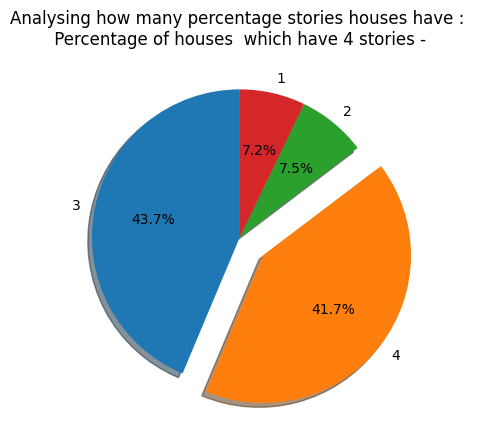

In [158]:
labels = review.stories.unique()

plt.title("Analysing how many percentage stories houses have : \n Percentage of houses  which have 4 stories - ",color = "black")


plt.pie(review.stories.value_counts(),labels = labels,startangle = 90,autopct="%1.1f%%",shadow = True,explode = [0,0.2,0,0])


plt.show()

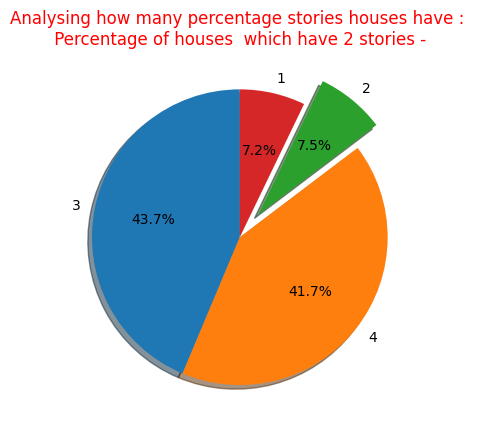

In [160]:
labels = review.stories.unique()

plt.title("Analysing how many percentage stories houses have : \n Percentage of houses  which have 2 stories - ",color = "red")


plt.pie(review.stories.value_counts(),labels = labels,startangle = 90,autopct="%1.1f%%",shadow = True,explode = [0,0,0.2,0])


plt.show()

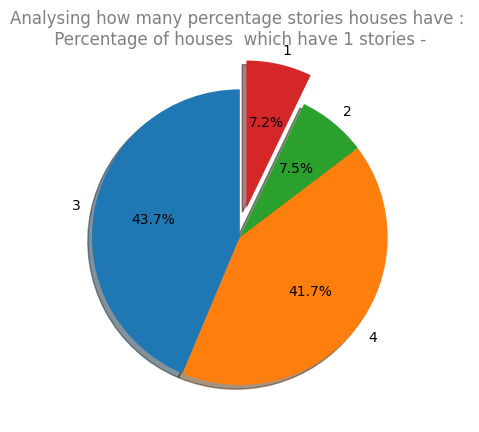

In [161]:
labels = review.stories.unique()

plt.title("Analysing how many percentage stories houses have : \n Percentage of houses  which have 1 stories - ",color = "grey")


plt.pie(review.stories.value_counts(),labels = labels,startangle = 90,autopct="%1.1f%%",shadow = True,explode = [0,0,0,0.2])


plt.show()

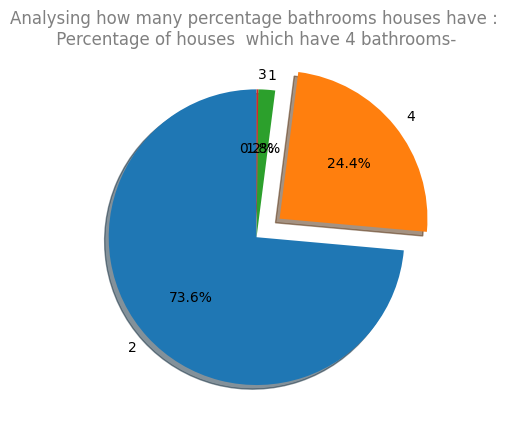

In [166]:
labels = review.bathrooms.unique()

plt.title("Analysing how many percentage bathrooms houses have : \n Percentage of houses  which have 4 bathrooms- ",color = "grey")


plt.pie(review.bathrooms.value_counts(),labels = labels,startangle = 90,autopct="%1.1f%%",shadow = True,explode = [0,0.2,0,0])


plt.show()

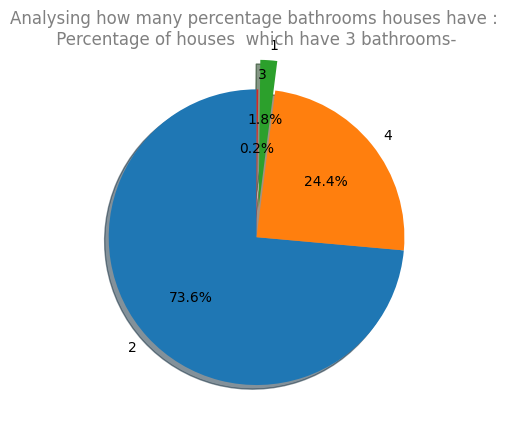

In [168]:
labels = review.bathrooms.unique()

plt.title("Analysing how many percentage bathrooms houses have : \n Percentage of houses  which have 3 bathrooms- ",color = "grey")


plt.pie(review.bathrooms.value_counts(),labels = labels,startangle = 90,autopct="%1.1f%%",shadow = True,explode = [0,0,0.2,0])


plt.show()

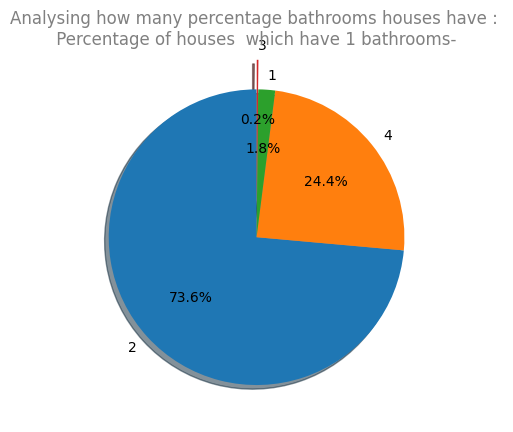

In [170]:
labels = review.bathrooms.unique()

plt.title("Analysing how many percentage bathrooms houses have : \n Percentage of houses  which have 1 bathrooms- ",color = "grey")


plt.pie(review.bathrooms.value_counts(),labels = labels,startangle = 90,autopct="%1.1f%%",shadow = True,explode = [0,0,0,0.2])


plt.show()

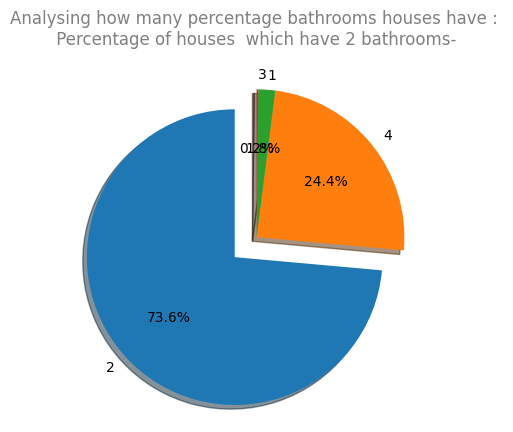

In [172]:
labels = review.bathrooms.unique()

plt.title("Analysing how many percentage bathrooms houses have : \n Percentage of houses  which have 2 bathrooms- ",color = "grey")


plt.pie(review.bathrooms.value_counts(),labels = labels,startangle = 90,autopct="%1.1f%%",shadow = True,explode = [0.2,0,0,0])


plt.show()

In [3]:
review

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
import seaborn as sns

In [ ]:
sns.histplot(review)
plt.show()